# ADASYN

Tạo mẫu mới bằng cách nội suy các mẫu của lớp thiểu số và các neighbour gần nhất của nó. Nó tạo ra nhiều mẫu từ các mẫu khó phân loại hơn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import ADASYN

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [3]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

<details><summary> Gợi ý </summary>

Sử dụng ```make_blobs```

</details>

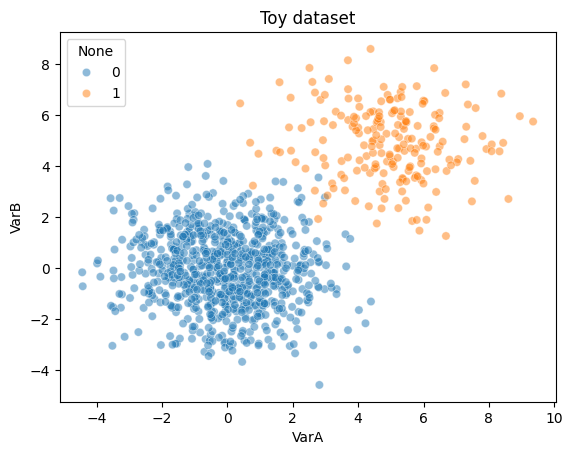

In [4]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## ADASYN

[ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

In [5]:
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
ada = ADASYN(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    n_neighbors=5,
    n_jobs=4
)

X_res, y_res = ada.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[ADASYN()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

</details>

In [6]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [9]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

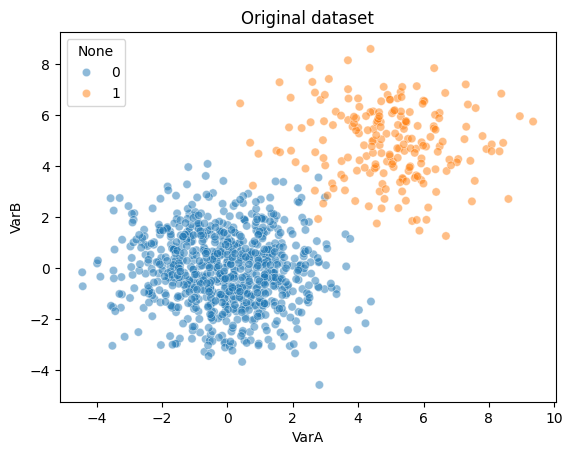

In [10]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

<details><summary> Gợi ý </summary>

[scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

</details>

In [ ]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

[scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

</details>

Các quan sát mới khác với các quan sát ban đầu, chúng nằm ở ranh giới giữa các lớp.

**BÀI TẬP**

- Kiểm tra ADASYN sử dụng tập dữ liệu giả lập mà chúng ta đã tạo và xem phân phối của dữ liệu mới tạo thay đổi thế nào với các phân tách lớp khác nhau.